In [34]:
pip install fredapi


In this project, I analyzed, modeled, and forecasted exchange rate ratios of Euro(EUR) with UK Pound (GBP).

# **Data Collection**

Data is gathered from https://fred.stlouisfed.org using the FRED API.
The exchange rate has a frequency of** Month**

**The Exchange Rate Format**

The FRED API provides exchange rates in two formats:

Currency/USD (for currencies that have higher value than USD, e.g., EUR/USD)
USD/Currency (for currencies that have lower value than USD, e.g., GBP/USD)
Since I am working with EUR/GBP, you will likely need to find the respective EUR/USD and GBP/USD exchange rates from FRED and use them to derive the EUR/GBP exchange rate:
EUR/GBP= (GBP/USD)/(EUR/USD)
​

In [35]:
# import the necessary libraries
import pandas as pd
from fredapi import Fred
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Connecting to the FRED API
from fredapi import Fred

# Get a free API key from the FRED website
fred = Fred(api_key='857c04615e67f47c1c04388e5c122679')

In [37]:
# FRED database for series related to exchange rates in the UK
fred.search('Exchange monthly UK')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
EXUSUK,EXUSUK,2025-03-05,2025-03-05,U.S. Dollars to U.K. Pound Sterling Spot Excha...,1971-01-01,2025-02-01,Monthly,M,U.S. Dollars to One U.K. Pound Sterling,U.S. $ to 1 U.K. Pound Sterling,Not Seasonally Adjusted,NSA,2025-03-03 15:19:47-06:00,43,Averages of daily figures. Noon buying rates i...
RBGBBIS,RBGBBIS,2025-03-05,2025-03-05,Real Broad Effective Exchange Rate for United ...,1994-01-01,2025-01-01,Monthly,M,Index 2020=100,Index 2020=100,Not Seasonally Adjusted,NSA,2025-02-20 11:01:22-06:00,32,Real effective exchange rates are calculated a...
USUKFXUKM,USUKFXUKM,2025-03-05,2025-03-05,U.S. / U.K. Foreign Exchange Rate in the Unite...,1791-01-01,2017-01-01,Monthly,M,U.S. Dollars to One British Pound,U.S. $ to 1 British Pound,Not Seasonally Adjusted,NSA,2017-06-09 08:51:15-05:00,23,This series was constructed by the Bank of Eng...
CCEUSP01GBM651N,CCEUSP01GBM651N,2025-03-05,2025-03-05,Currency Conversions: EURO Exchange Rate: Spot...,1999-01-01,2023-12-01,Monthly,M,Pound Sterling,Pound Sterling,Not Seasonally Adjusted,NSA,2024-01-12 14:22:05-06:00,22,OECD Descriptor ID: CCEUSP01 OECD unit ID: GBP...
CCUSMA02GBM618N,CCUSMA02GBM618N,2025-03-05,2025-03-05,Currency Conversions: US Dollar Exchange Rate:...,1957-01-01,2025-01-01,Monthly,M,Pound Sterling,Pound Sterling,Not Seasonally Adjusted,NSA,2025-02-17 14:17:35-06:00,16,OECD Data Filters: REF_AREA: GBR MEASURE: CC ...
CCUSMA02GBM661N,CCUSMA02GBM661N,2025-03-05,2025-03-05,Currency Conversions: US Dollar Exchange Rate:...,1960-01-01,2023-12-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2024-01-12 14:32:52-06:00,1,OECD Descriptor ID: CCUSMA02 OECD unit ID: IDX...
CCUSMA02GBM659N,CCUSMA02GBM659N,2025-03-05,2025-03-05,Currency Conversions: US Dollar Exchange Rate:...,1960-01-01,2023-12-01,Monthly,M,Growth rate same period previous year,Growth rate same period previous Yr.,Not Seasonally Adjusted,NSA,2024-01-12 14:32:52-06:00,1,OECD Descriptor ID: CCUSMA02 OECD unit ID: PC ...
GBRXTEXVA01CXMLM,GBRXTEXVA01CXMLM,2025-03-05,2025-03-05,International Merchandise Trade Statistics: Ex...,1957-01-01,2024-12-01,Monthly,M,"US dollars, exchange rate converted","US $, exchange rate converted",Not Seasonally Adjusted,NSA,2025-02-17 14:10:23-06:00,1,OECD Data Filters: REF_AREA: GBR COUNTERPART_...
XTEXVA01GBM667S,XTEXVA01GBM667S,2025-03-05,2025-03-05,International Merchandise Trade Statistics: Ex...,1957-01-01,2024-12-01,Monthly,M,"US dollars, exchange rate converted","US $, exchange rate converted",Seasonally Adjusted,SA,2025-02-17 13:57:03-06:00,6,OECD Data Filters: REF_AREA: GBR COUNTERPART_...


In [38]:
import os

# Create the data directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# EURO/USD ratio is obtained and stored to the local
euro_monthly = fred.get_series(series_id = 'EXUSEU')
euro_monthly.to_csv('data/eurom.csv', header=True)

# Euro_monthly.to_csv
euro_monthly



,0
1999-01-01,1.1591
1999-02-01,1.1203
1999-03-01,1.0886
1999-04-01,1.0701
1999-05-01,1.0630
...,...
2024-10-01,1.0895
2024-11-01,1.0621
2024-12-01,1.0472
2025-01-01,1.0356


In [39]:
# The GBP/USD ratio is obtained and stored to the local
uk_monthly = fred.get_series(series_id = 'EXUSUK')

# UK_monthly
uk_monthly.to_csv('data/ukm.csv', header=True)
uk_monthly

,0
1971-01-01,2.4058
1971-02-01,2.4178
1971-03-01,2.4187
1971-04-01,2.4179
1971-05-01,2.4187
...,...
2024-10-01,1.3043
2024-11-01,1.2738
2024-12-01,1.2647
2025-01-01,1.2354


In [40]:
# Calculate EUR/GBP exchange rate
# Divide EUR/USD by GBP/USD to get EUR/GBP
eur_gbp = euro_monthly / uk_monthly

# Save EUR/GBP exchange rate to CSV
eur_gbp.to_csv('data/eur_gbp.csv', header=True)

# Display EUR/GBP data
print("EUR/GBP Data:")
print(eur_gbp)

EUR/GBP Data:
1971-01-01         NaN
1971-02-01         NaN
1971-03-01         NaN
1971-04-01         NaN
1971-05-01         NaN
                ...   
2024-10-01    0.835314
2024-11-01    0.833804
2024-12-01    0.828022
2025-01-01    0.838271
2025-02-01    0.830250
Length: 650, dtype: float64


**Data Cleaning and Pre-Processing**

1) Convert the Series into a Dataframe
2)Consider the data from 2017 only; Slice the dataset
3)Set the date column as the index
4)Type cast the date column into datetime type, if not already

In [41]:
# Convert the Series into a DataFrame
eur_gbp_df = pd.DataFrame(eur_gbp, columns=['EUR/GBP'])

# Consider the data from 2017 only
eur_gbp_df = eur_gbp_df.loc['2017-01-01':'2025-01-01']

# Set the date column as the index
eur_gbp_df.index = pd.to_datetime(eur_gbp_df.index)

# Setting the period of the data to be the Month Start
euro_gbp_df = eur_gbp_df.asfreq('MS')
euro_gbp_df


,EUR/GBP
2017-01-01,0.859950
2017-02-01,0.852341
2017-03-01,0.865878
2017-04-01,0.847694
2017-05-01,0.854668
...,...
2024-09-01,0.840003
2024-10-01,0.835314
2024-11-01,0.833804
2024-12-01,0.828022


2) **Missing value treatment**

In [42]:
eur_gbp_df.isnull().sum()


,0
EUR/GBP,0


There are no missing values in the data sets!

**3) Initial Visualization of the Exchange Rate**

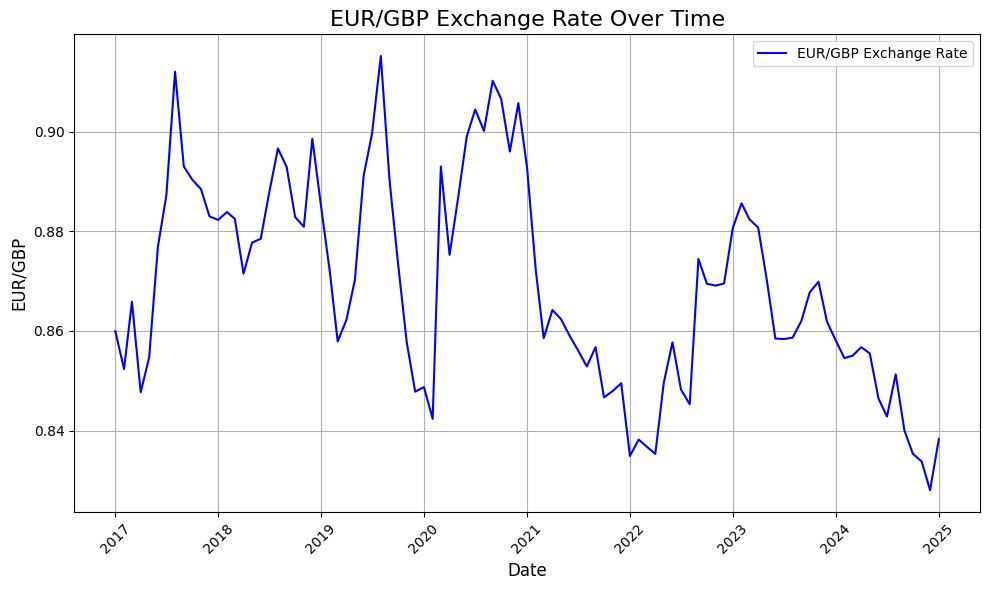

In [43]:
# Import library for visualization
import matplotlib.pyplot as plt

# Plot the EUR/GBP exchange rate over time
plt.figure(figsize=(10, 6))
plt.plot(euro_gbp_df.index, euro_gbp_df['EUR/GBP'], label='EUR/GBP Exchange Rate', color='b')

# Adding labels and title to the plot
plt.title('EUR/GBP Exchange Rate Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('EUR/GBP', fontsize=12)

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=45)

# Add grid lines for better readability
plt.grid(True)

# Show the plot
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


**4) Testing for Stationarity (Mean and Standard Deviation)**

 ---->  crucial step in time series analysis, particularly when you're working with models like ARIMA, SARIMA.

**-What is Stationarity?**

means its statistical properties such as **mean**, **variance**, and **autocovariance** (correlation between values at different time lags) do not change over time.


**Mean:** The average value of the time series is constant over time.
**Variance:** The variability of the time series is constant over time.
**Autocovariance:** The correlation between observations at different times only depends on the lag between them, not the actual time.

**-If a time series is not stationary**---> need to transform it (through differencing, logarithmic transformations, etc.)

**-Why is Stationarity Important?**
Many time series models, like ARIMA, assume that the data is stationary. If the series is not stationary, the model might not perform well --> misleading results.


**-How to Test for Stationarity?**
The two most common tests are:

1. **Visual Inspection (Plotting)** -->Visually inspect the data:

If the mean and variance appear to change over time (e.g., if the series has a trend or seasonality), it’s likely **non-stationary**.
If the series fluctuates around a constant mean and its variance does not change, it’s likely **stationary**.

2. **Augmented Dickey-Fuller (ADF) Test**
It tests the null hypothesis that the series is non-stationary (i.e., it has a unit root).

Null Hypothesis: The time series is non-stationary (has a unit root).
Alternative Hypothesis: The time series is stationary.

If the **p-value** of the ADF test is below a significance level (usually 0.05), we reject the null hypothesis and conclude that the series is **stationary**.

If the **p-value is greater than 0.05**, we cannot reject the null hypothesis and the **series is non-stationary**.



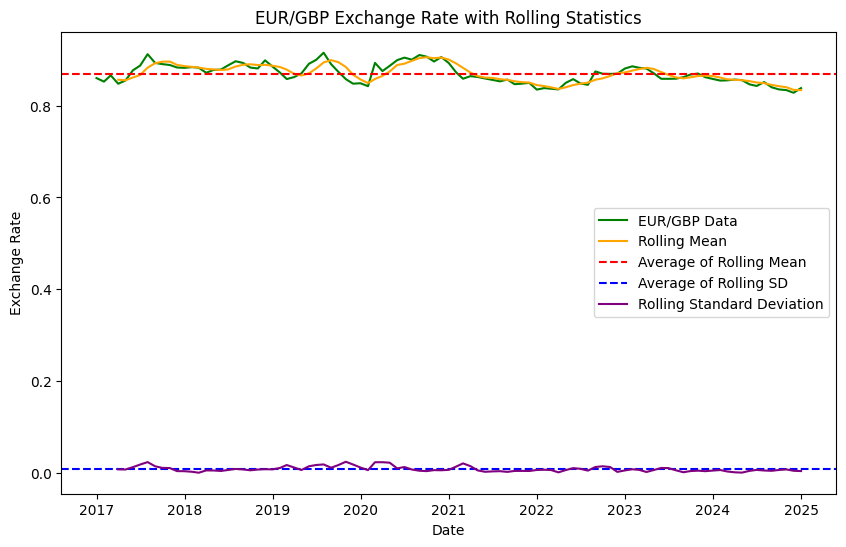

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

window_size = 4  # Quarterly window (use 4 for quarterly if data is monthly)

# Calculate Rolling Mean and Rolling Standard Deviation
rolling_mean = eur_gbp_df['EUR/GBP'].rolling(window=window_size).mean()
rolling_std = eur_gbp_df['EUR/GBP'].rolling(window=window_size).std()

# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(eur_gbp_df['EUR/GBP'], color = 'g', label = 'EUR/GBP Data')  # Original data
plt.plot(rolling_mean, label = "Rolling Mean", color='orange')  # Rolling Mean
plt.axhline(y=np.mean(rolling_mean), color='r', linestyle='--', label = "Average of Rolling Mean")  # Mean of Rolling Mean
plt.axhline(y=np.mean(rolling_std), color='b', linestyle='--', label = "Average of Rolling SD")  # Mean of Rolling Standard Deviation
plt.plot(rolling_std, label = "Rolling Standard Deviation", color='purple')  # Rolling Standard Deviation

# Add title, labels, and legend
plt.title('EUR/GBP Exchange Rate with Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()

# Show the plot
plt.show()


**Interpretation**


---


Theoretically, the time series should only depend on the previous data point
and should be independent of the time dimension. i.e., it should have a constant mean and variance throughout the time. Such time-series are considered **stationary** and are **good for further time-series analysis**.

The **rolling mean line** fluctuates up and down because it reflects short-term trends or cycles in the data, depending on the window size. It's more sensitive to local changes in the data.
**The average of the rolling mean** line is more stable and acts as a long-term summary. It represents the general direction the rolling mean is taking over time.
The **distance** between the rolling mean and the average of the rolling mean can give you an idea of how much short-term volatility exists in your data. Larger fluctuations mean the data is more volatile; smaller fluctuations suggest smoother trends.

For the given data of the Euro/Uk ratio:

Rolling mean and Rolling standard deviation, and they are constant over time (i.e., do not show any significant trend or change)---> the series is more likely to be stationary.

---
**b) Augmented Dickey-Fuller Test**
Null Hypothesis: The dataset is non-stationary.

Alternate Hypothesis: The dataset is stationary.

The Null hypothesis is rejected if the p-value is less than 0.05


In [62]:
print(eur_gbp_df.columns)

Index(['EUR/GBP', 'Differenced_Data'], dtype='object')


In [46]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller (ADF) test on the 'EUR/GBP' column
result = adfuller(eur_gbp_df['EUR/GBP'])

# Extract and print the test statistic and p-value
adf_statistic = result[0]
p_value = result[1]
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print('Critical Values:', result[4])

# Interpretation of results
if p_value < 0.05:
    print("\nThe series is stationary (reject the null hypothesis).")
else:
    print("\nThe series is non-stationary (fail to reject the null hypothesis).")



ADF Statistic: -2.598703099730839
p-value: 0.0932656067143714
Critical Values: {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}

The series is non-stationary (fail to reject the null hypothesis).


**Interpretation**

**ADF Statistic:** The more negative this value, the stronger the evidence that the series is stationary.

**p-value:** If you get a p-value less than 0.05, you can conclude that your time series is stationary, which is a good property for time series forecasting.

**Critical Values:**  These values represent thresholds at different confidence levels (1%, 5%, and 10%) that the ADF statistic must exceed (in negative terms) to reject the null hypothesis.
If the ADF statistic is more negative than the critical value, it suggests that the time series is stationary. If the ADF statistic is less negative than the critical value, the series is likely non-stationary.

1% level: -3.50
5% level: -2.89
10% level: -2.58

The ADF statistic (-2.60) is greater than the 5% critical value (-2.89) but less than the 1% critical value (-3.50). However, it is slightly more negative than the 10% critical value (-2.58), meaning it does not strongly suggest stationarity at the 5% level.

The series is non-stationary (because the p-value is greater than 0.05 and the ADF statistic doesn't exceed the critical values at the 5% level).
Dealing with Non-Stationarity




**Decomposing the Time Series**

separate the underlying components and make it easier to analyze trends, seasonality, and the residual noise. This is often done using the *seasonal_decompose()*


**Components of Time Series:**

**Trends:** ---> long-term movement in the data. continuous increase or decrease over time.


**Seasonality:** --->repeating patterns  in the data at regular intervals (e.g., monthly, yearly).

**Residuals (or Noise):** --->random component that remains after removing the trend and seasonal effects. (leftover part of the time series)

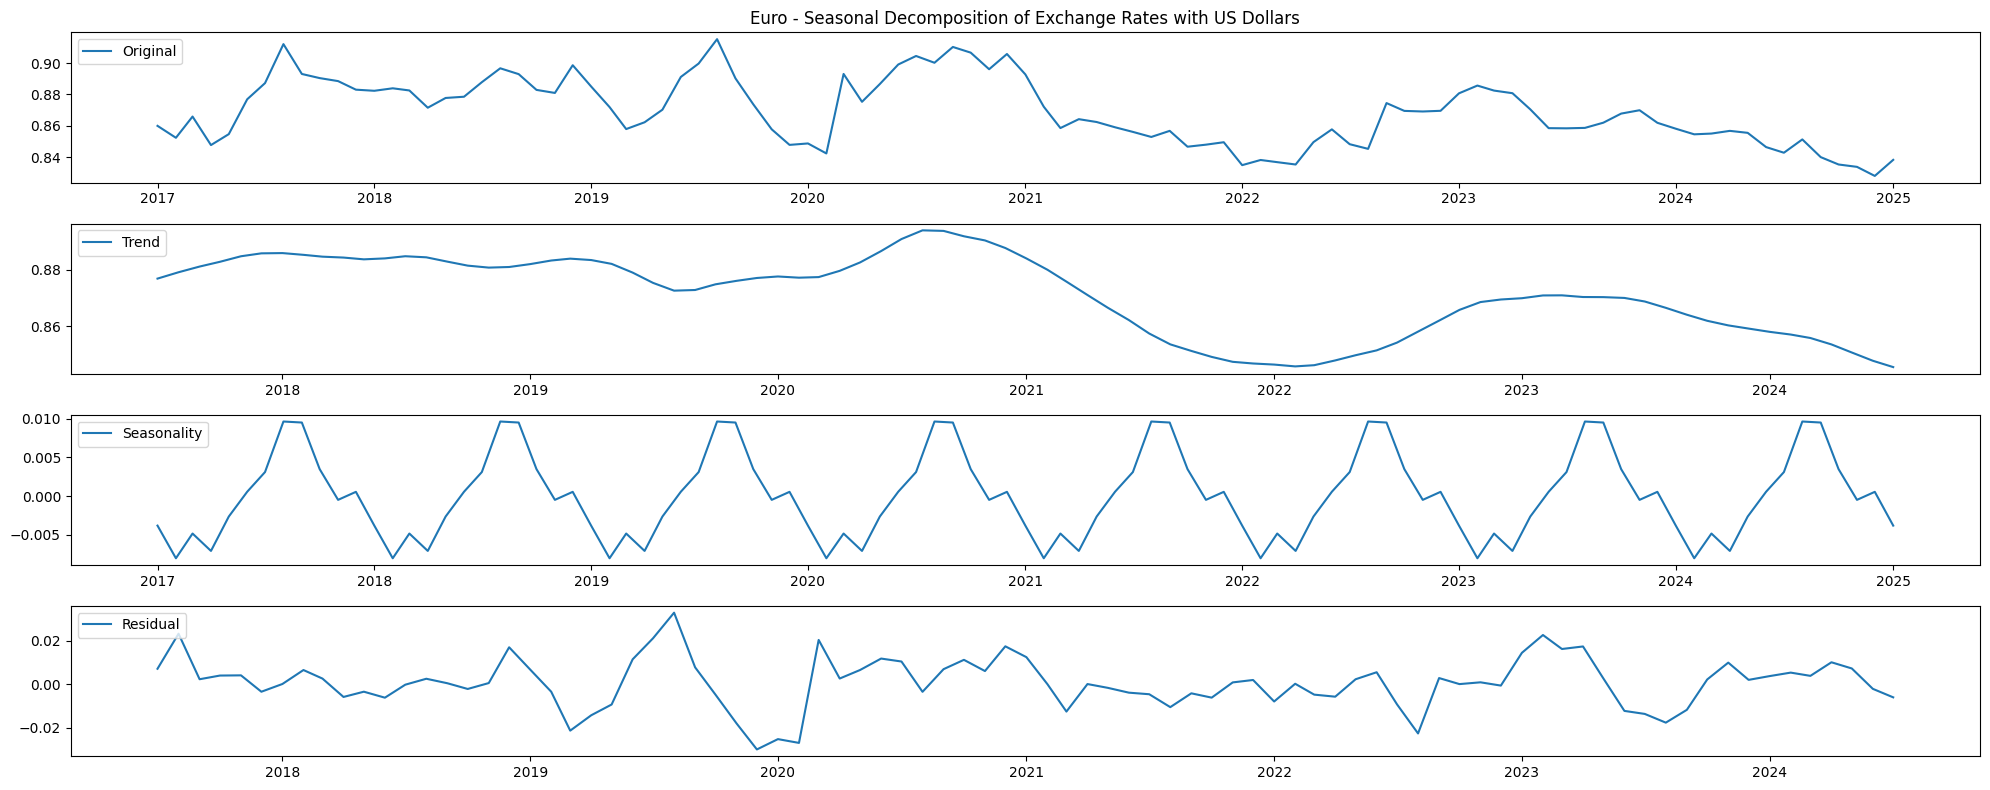

In [47]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# performing a seasonal decomposition
eur_uk_decomposition = seasonal_decompose(eur_gbp_df['EUR/GBP'], model='additive', period=12)

# Extracts components
euro_trend = eur_uk_decomposition.trend
euro_seasonal = eur_uk_decomposition.seasonal
euro_residual = eur_uk_decomposition.resid

# Plot the result
plt.figure(figsize = (20,8))
plt.subplot(411)
plt.title("Euro - Seasonal Decomposition of Exchange Rates with US Dollars")
plt.plot(euro_gbp_df, label = "Original")
plt.legend(loc = "upper left")
plt.subplot(412)
plt.plot(euro_trend, label = "Trend")
plt.legend(loc = "upper left")
plt.subplot(413)
plt.plot(euro_seasonal, label = "Seasonality")
plt.legend(loc = "upper left")
plt.subplot(414)
plt.plot(euro_residual, label = "Residual")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()


**Differencing the exchange rates** --->  technique used in time series analysis to make a series stationary.

**What is Differencing?** --> subtracting the previous observation from the current observation--> removing trends or cycles, making the time series more stationary.
subtract the previous month's value from the current month's value.

If (ADF) test still fails --->  this could suggest that the series might have more complex characteristics that need further treatment: Second Differencing or Seasonal Differencing

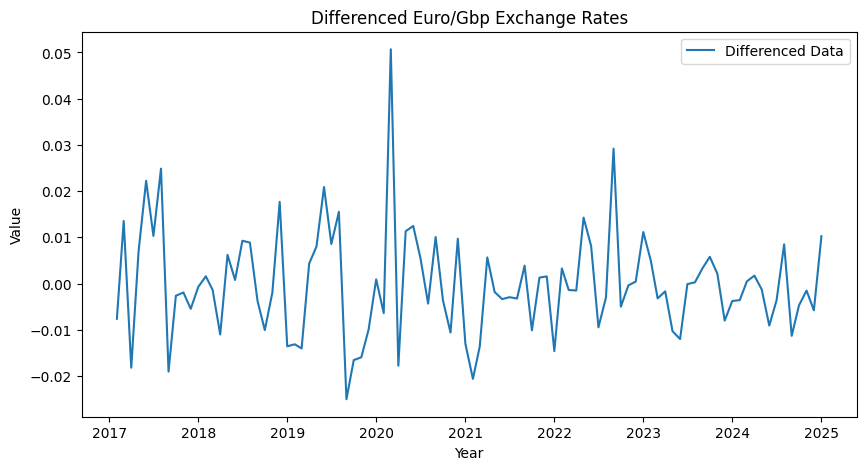

In [48]:
# Calculating the first difference of the series
eur_gbp_df['Differenced_Data'] = eur_gbp_df['EUR/GBP'].diff()

# Handling Missing Values (Since differencing reduces the data by one time point)
# The first value in the new differenced column will be NaN.
# This line removes the first row (which has a NaN value) after differencing
eur_gbp_df = eur_gbp_df.dropna()

# Plot the differenced time series data
plt.figure(figsize=(10, 5))
plt.title("Differenced Euro/Gbp Exchange Rates")
plt.plot(eur_gbp_df.index, eur_gbp_df['Differenced_Data'], label='Differenced Data')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()



In [49]:
# Storing the final data sets on the local
eur_gbp_df.to_csv('data/euro_finalm.csv')


# **Auto-Correlation Function (ACF)**
--->  measures the correlation between a time series and a lagged version of itself. calculates the correlation between the time series values at time t and time t+k (k is the lag)


It helps you understand how past values influence current values. If there is a high correlation between points separated by a specific time interval (lag), that means the data has ** seasonality or trend**.

Example: If you have monthly exchange rates, the ACF will show whether the value of the exchange rate this month is correlated with the value of the exchange rate 1 month ago, 2 months ago, etc.

**Partial Auto-Correlation Function (PACF)**

--> measures the correlation between a time series and its lagged values, but it controls for the correlations at shorter lags. It helps to understand the direct relationship between the current value and past values at specific lags, without considering the intermediate dependencies.



**Why are ACF and PACF important?**

--> help in confirming whether a series is stationary, or how well it has been transformed into stationarity. For example, if there was a large drop in the exchange rate last month, it could influence the exchange rate this month as well due to market trends or economic factors. ACF helps to quantify how much of an influence there is between the current and past values.

---> Forecasting: If the exchange rates are strongly correlated with past values, this means that you can use past data (such as last month’s exchange rate) to help predict future values.

ACF helps you understand how far back you should look in time to forecast future values effectively. If ACF shows a high correlation with the value from 1 month ago, you might include the last month’s value as an important feature for your model.

If you have monthly exchange rate data, ACF will calculate the correlation between the value of the exchange rate in:

Month 1 and Month 2 (lag=1)
Month 1 and Month 3 (lag=2)
Month 1 and Month 4 (lag=3), and so on...
If there's a strong correlation at lag=1, this means that the exchange rate this month is strongly related to last month's exchange rate.



**Why is This Useful?**

**Market Analysis:** By understanding these dependencies, you can identify patterns such as:

---> Exchange rates might follow certain patterns based on months of the year (e.g., currency exchange rates might behave differently during the holidays).
---> Cyclic trends: Some currencies follow cyclical movements, where certain periods are more volatile than others.

--->**ARIMA** Model Selection: In time series forecasting models like ARIMA, ACF and PACF plots help in selecting the parameters:

**AR (Auto-Regressive) term:** how much of the past data influences the current value (lag).

**MA (Moving Average) term:** how to incorporate the moving average error from past values.




**Autoregressive - AR (q)**

**Integrated - I (d)**

**Moving Average - MA (p)**

We obtain the first insignificant lag from ACF and PACF plots to apply for q and p parameters respectively.

Since, we use the differenced dataset for the modeling and prediction, we will set d = 0  implying the data is already stationary.

<Figure size 1000x600 with 0 Axes>

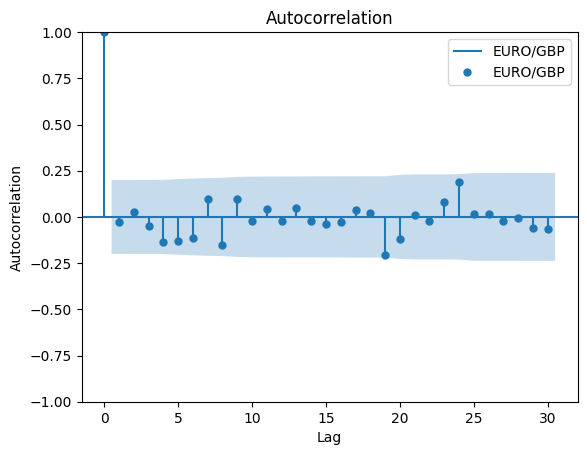

In [50]:
# Generate the Autocorrelation Function (ACF)
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Euro-GBP Data
plt.figure(figsize=(10, 6))
plot_acf(eur_gbp_df['Differenced_Data'], lags=30, label = "EURO/GBP")
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.legend()
plt.show()





**What the ACF plot shows:**
**Positive values** --->  there is a correlation between the current observation and a previous one at a specific lag.

**Negative values** ---> an inverse relationship at a specific lag.

**Zero or near-zero values** ---> the observations are not correlated at that lag.



<Figure size 1000x600 with 0 Axes>

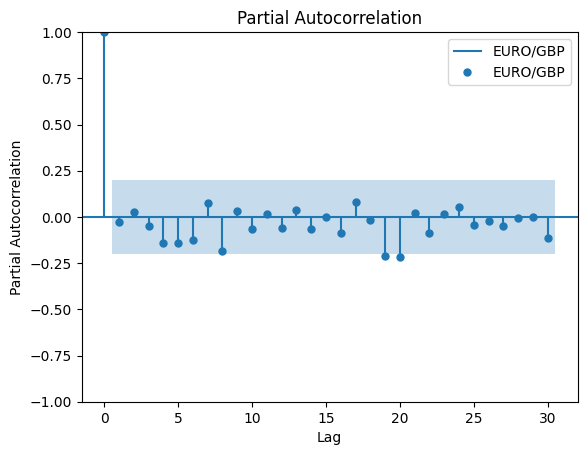

In [51]:
plt.figure(figsize=(10, 6))
plot_pacf(eur_gbp_df['Differenced_Data'], label = "EURO/GBP",lags=30)

# plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.legend()
plt.show()

We obtain the first insignificant lag from ACF and PACF plots to apply for q and p parameters respectively.

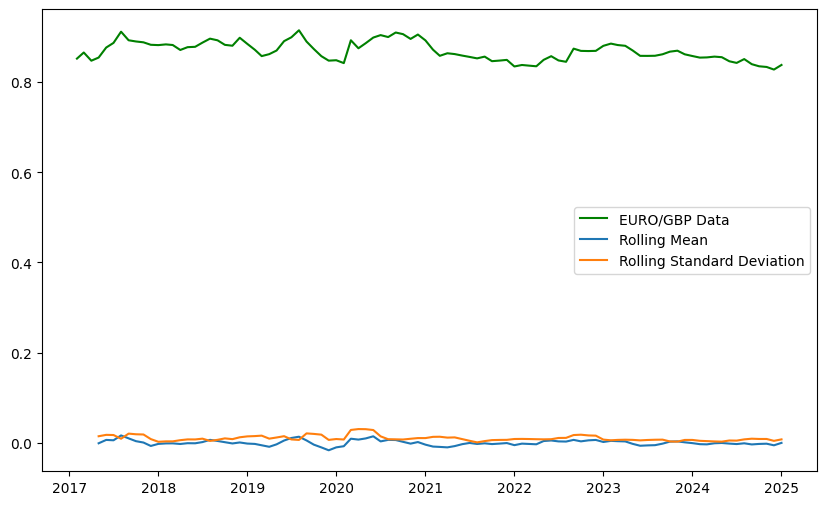

In [52]:
plt.figure(figsize=(10, 6))
window_size = 4 # Quarterly window

rolling_mean = eur_gbp_df['Differenced_Data'].rolling(window=window_size).mean()
rolling_std = eur_gbp_df['Differenced_Data'].rolling(window=window_size).std()
plt.plot(eur_gbp_df['EUR/GBP'], color = 'g', label = 'EURO/GBP Data')
plt.plot(rolling_mean, label = "Rolling Mean")
plt.plot(rolling_std, label = "Rolling Standard Deviation")
plt.legend();



In [53]:
# Perform the Augmented Dickey-Fuller (ADF) test
result = adfuller(eur_gbp_df['Differenced_Data'])
adf_statistic = result[0]
p_value = result[1]
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print('Critical Values',result[4])

ADF Statistic: -9.917346455834258
p-value: 3.0550968382939825e-17
Critical Values {'1%': -3.5011373281819504, '5%': -2.8924800524857854, '10%': -2.5832749307479226}


**Interpretation**

p-value is extremely small,

The test statistic (-9.8393) is more negative than the critical values at all levels (1%, 5%, and 10%).

--> we can reject the null hypothesis with high confidencc --> the given time series is stationary.



From the Auto-correlation and Partial Auto-correlation plots the parameters for Autoregressive (p) and Moving Average (q) models are determined as follows -


The data is ready for Prediction and Forecasting.




# **ARIMA Forecasting**
*   ARIMA Modeling and Forecasting

ARIMA (AutoRegressive Integrated Moving Average) forecasting is a time series forecasting method that combines autoregressive (AR), differencing (I), and moving average (MA) components to model and predict future values of a time series.

The ARIMA model is denoted as ARIMA (p, d, q), where:

p represents the order of the autoregressive component (AR).
d represents the degree of differencing needed to make the series stationary.
q represents the order of the moving average component (MA).

The ARIMA model captures time series patterns, including trend, seasonality, and other temporal dependencies. We use the differenced data for the analysis and pass ARIMA(p, 0, q), however, it is first degree differenced.


In [54]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings


# **Data Literacy**

I  consider the **differenced data **for modeling and prediction.

I split this data into **train and test** sets for modeling, prediction(evauation), forecasting.

**forcasts exchange rate** for the next 10 months

In [55]:
# Split the dataset into train and test sets

split_index = int(0.9 * len(eur_gbp_df))
train = eur_gbp_df['Differenced_Data'].iloc[:split_index]
test = eur_gbp_df['Differenced_Data'].iloc[split_index:]


# **Training ARIMA model**
ARIMA Parameters from ACF and PACF:

Euro/Gbp: p = 8, q = 9


In [56]:
from statsmodels.tsa.arima.model import ARIMA

In [57]:
warnings.filterwarnings('ignore')

start = len(train)
end = len(train) + len(test)-1
Arima_model = ARIMA(train, order=(8,0,9))
Arima_model_fit = Arima_model.fit()
pred = Arima_model_fit.predict(start, end)
print(pred)

2024-04-01    0.000637
2024-05-01    0.000766
2024-06-01    0.001709
2024-07-01    0.000507
2024-08-01    0.003176
2024-09-01   -0.001026
2024-10-01    0.000843
2024-11-01   -0.001754
2024-12-01   -0.000433
2025-01-01   -0.000479
Freq: MS, Name: predicted_mean, dtype: float64


# **Visualizating the Model Predictions**

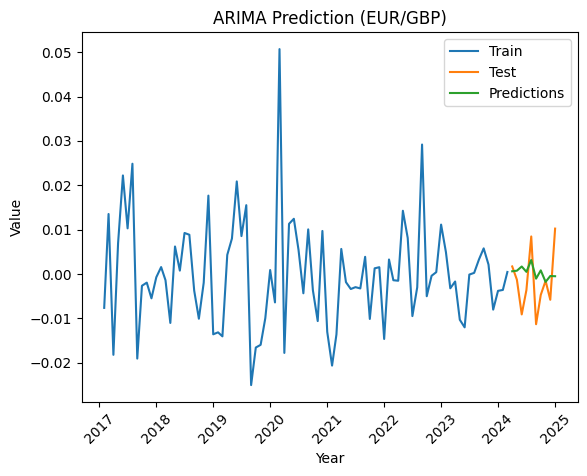

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

pred_df = pd.DataFrame(pred)
pred_df.index = pred_df.index.astype(str)


# Ensure the datetime index is correctly formatted for plotting
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)
pred_df.index = pd.to_datetime(pred_df.index)

# Plotting
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred_df, label='Predictions')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('ARIMA Prediction (EUR/GBP)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()





In [59]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ensure pred_df is a single Series
pred_df = pred_df.squeeze()

# Align test and pred_df (reset index)
test = test.reset_index(drop=True)
pred_df = pred_df.reset_index(drop=True)

# Ensure they have the same length
pred_df = pred_df.iloc[:len(test)]

# Calculate errors
mae_euro = mean_absolute_error(test, pred_df)
mse_euro = mean_squared_error(test, pred_df)
rmse_euro = np.sqrt(mse_euro)

# Store performance metrics in a DataFrame
euro_perf = pd.DataFrame([{
    'Currency': 'Euro/GBP',
    'MAE': mae_euro,
    'MSE': mse_euro,
    'RMSE': rmse_euro
}])

# Display the results
print(euro_perf)


   Currency       MAE       MSE      RMSE
0  Euro/GBP  0.005543  0.000045  0.006681


**Interpretation:**

**From Plot:** We observe that the model captures some of the trend, however, the actual observations (test) is varying not as expected by the predicted observations.

**From Performance Metrics:**

The error values are all very small (RMSE < 0.1), indicating that the model successfully captured the trend in the dataset and is reliable.

# **ARIMA Forecasting**

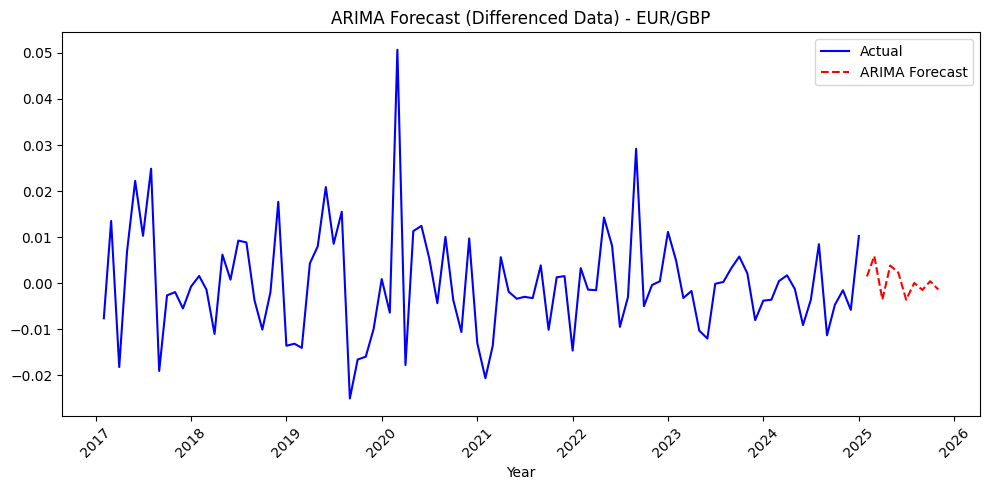

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ensure index is in DateTime format
eur_gbp_df.index = pd.to_datetime(eur_gbp_df.index)

# Ensure the column exists
if 'Differenced_Data' not in eur_gbp_df.columns:
    raise KeyError("Column 'Differenced_Data' not found in eur_gbp_df")

# Define forecast period (10 months from February 2025)
forecast_index = pd.date_range(start='2025-02-01', periods=10, freq='MS')

# Fit ARIMA model
eur_gbp = ARIMA(eur_gbp_df['Differenced_Data'], order=(8, 0, 9))
model = eur_gbp.fit()

# Forecast next 10 months
euro_forecast = model.forecast(steps=10)
euro_forecast.index = forecast_index

# Plot actual and forecasted data
plt.figure(figsize=(10, 5))
plt.plot(eur_gbp_df['Differenced_Data'], label='Actual', color='blue')
plt.plot(euro_forecast, label='ARIMA Forecast', color='red', linestyle='dashed')
plt.title('ARIMA Forecast (Differenced Data) - EUR/GBP')
plt.xlabel('Year')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



In [61]:
# Ensure pred_df is a Series and align it with test data
pred_df = pred_df.squeeze()
test = test.reset_index(drop=True)
pred_df = pred_df.reset_index(drop=True)

# Ensure they have the same length
pred_df = pred_df.iloc[:len(test)]

# Assign the original test index (if it contains dates)
pred_df.index = test.index

# Convert index to a date format if necessary
pred_df.index = pd.date_range(start='2025-02-02', periods=len(pred_df), freq='MS')

# Display predictions in the requested format
print(pred_df)


2025-03-01    0.000637
2025-04-01    0.000766
2025-05-01    0.001709
2025-06-01    0.000507
2025-07-01    0.003176
2025-08-01   -0.001026
2025-09-01    0.000843
2025-10-01   -0.001754
2025-11-01   -0.000433
2025-12-01   -0.000479
Freq: MS, Name: predicted_mean, dtype: float64


# **Interpretation**

The forecasting predicts that the EUR/GBP exchange rate will experience slight fluctuations in 2025, with some months showing a moderate increase and others a small decrease.


April 2025 is expected to see a significant increase in the exchange rate by 0.001709, indicating a stronger upward movement during that month.

After April, the rate slows down, with May 2025 experiencing a slight dip of 0.000507 and July 2025 showing a moderate decrease of -0.001026, suggesting a temporary reversal or correction.


In general, the model suggests a fluctuating pattern where the exchange rate increases and decreases with no strong long-term trend, though the changes are relatively small month-to-month.